In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [263]:
df=pd.read_csv('/Users/lucy/Downloads/inner.csv')

In [3]:
df

,Unnamed: 0,전통주명,가격,용량,주종,도수,단맛,신맛,바디감,향,청량감,균형감,목넘김,맛,잘 어울리는 음식,주원료,제조사,이미지
0,0,감그린 레귤러,"18,000",750ml,과실주,12.0,3.0,3.0,2.0,NaN,3.0,NaN,NaN,NaN,소고기류,감(국내산),NaN,https://dthumb-phinf.pstatic.net/?src=%22https...
1,1,감그린 스페셜,"25,000",750ml,과실주,12.0,3.0,3.0,3.0,NaN,3.0,NaN,NaN,NaN,소고기류,감(국내산),청도감와인,https://dthumb-phinf.pstatic.net/?src=%22https...
2,2,감그린 아이스와인,"89,000",375ml,과실주,10.0,4.0,2.0,4.0,NaN,2.0,NaN,NaN,NaN,"모짜렐라 치즈, 카망베르, 스모키 치즈",감(국내산),청도감와인,https://dthumb-phinf.pstatic.net/?src=%22https...
3,3,감악산 머루주,"28,000",360ml,과실주,12.0,4.0,4.0,3.0,NaN,3.0,NaN,NaN,NaN,"메기, 참게, 흑염소, 오리로스구이","국내산 산머루원액 78.5%, 주정",NaN,https://dthumb-phinf.pstatic.net/?src=%22https...
4,4,고도리 레드와인 스위트,"22,000",750ml,과실주,12.0,3.0,3.0,3.0,NaN,2.0,NaN,NaN,NaN,"육회, 수육, 불고기",MBA 머루포도(경북 영천),NaN,https://dthumb-phinf.pstatic.net/?src=%22https...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,334,해창 생막걸리 6도,"3,000",900ml,탁주,6.0,1.0,1.0,2.0,NaN,3.0,NaN,NaN,NaN,간재미 찜,"햅쌀, 찹쌀, 물, 누룩",해창주조장,https://dthumb-phinf.pstatic.net/?src=%22https...
335,335,해창 생막걸리 9도,"6,000",900ml,탁주,9.0,1.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN,전복구이,"햅쌀, 찹쌀, 물, 누룩",해창주조장,https://dthumb-phinf.pstatic.net/?src=%22https...
336,336,호담 산양산삼 막걸리,"16,000",750ml,탁주,6.0,1.0,3.0,1.0,NaN,3.0,NaN,NaN,NaN,김치전,"쌀(경기미), 입국, 산양산삼, 정제수, 아스파탐",대농바이오우리산삼,https://dthumb-phinf.pstatic.net/?src=%22https...
337,337,호랑이 생 막걸리,"2,200",750ml,탁주,6.0,4.0,1.0,4.0,NaN,2.0,NaN,NaN,NaN,중국음식,"물, 쌀(국내산),에리스리톨, 효모, 국, 젖산, 합성향료,밀함유",배혜정도가,https://dthumb-phinf.pstatic.net/?src=%22https...


In [6]:
# iris 데이터(붓꽃) 예시

In [5]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [58]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [30]:
# 단신바청을 배열로만

In [264]:
단신바청=df[['단맛','신맛','바디감','청량감']]

In [28]:
단신바청.iloc[1]

단맛     3.0
신맛     3.0
바디감    3.0
청량감    3.0
Name: 1, dtype: float64

In [31]:
# 배열로 변환 (붓꽃 데이터와 같은 형태가 됨)

In [344]:
#단신바청=단신바청.values

In [36]:
단신바청_values=단신바청

In [37]:
단신바청_values

array([[3., 3., 2., 3.],
       [3., 3., 3., 3.],
       [4., 2., 4., 2.],
       ...,
       [1., 3., 1., 3.],
       [4., 1., 4., 2.],
       [2., 3., 2., 2.]])

In [39]:
단신바청

,단맛,신맛,바디감,청량감
0,3.0,3.0,2.0,3.0
1,3.0,3.0,3.0,3.0
2,4.0,2.0,4.0,2.0
3,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,2.0
...,...,...,...,...
334,1.0,1.0,2.0,3.0
335,1.0,1.0,2.0,2.0
336,1.0,3.0,1.0,3.0
337,4.0,1.0,4.0,2.0


In [70]:
# kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,random_state=0)
# kmeans.fit(단신바청)

In [41]:
# 결측치 제거

In [42]:
#Nan값을 0으로 바꾸기

In [50]:
단신바청_zero=단신바청.fillna(0)

In [51]:
단신바청_zero

,단맛,신맛,바디감,청량감
0,3.0,3.0,2.0,3.0
1,3.0,3.0,3.0,3.0
2,4.0,2.0,4.0,2.0
3,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,2.0
...,...,...,...,...
334,1.0,1.0,2.0,3.0
335,1.0,1.0,2.0,2.0
336,1.0,3.0,1.0,3.0
337,4.0,1.0,4.0,2.0


In [43]:
# nan인 행을 지우면 얼마나 남는지

In [59]:
#단신바청.dropna(how='all',axis=0) --> 안됨

In [55]:
# 0으로 채운 후. 군집화 수행 가능해짐 (4개로 지정)

In [53]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(단신바청_zero)

KMeans(n_clusters=4, random_state=0)

In [57]:
# 차원 축소 (속성 4개 -> 2개)

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(단신바청_zero.values)

단신바청_zero['pca_x'] = pca_transformed[:,0]
단신바청_zero['pca_y'] = pca_transformed[:,1]
단신바청_zero.head(3)

,단맛,신맛,바디감,청량감,pca_x,pca_y
0,3.0,3.0,2.0,3.0,2.146065,-0.357506
1,3.0,3.0,3.0,3.0,2.112166,-0.003119
2,4.0,2.0,4.0,2.0,1.461380,1.803906


In [61]:
단신바청_zero

,단맛,신맛,바디감,청량감,pca_x,pca_y
0,3.0,3.0,2.0,3.0,2.146065,-0.357506
1,3.0,3.0,3.0,3.0,2.112166,-0.003119
2,4.0,2.0,4.0,2.0,1.461380,1.803906
3,4.0,4.0,3.0,3.0,3.278823,0.249860
4,3.0,3.0,3.0,2.0,1.549273,0.176654
...,...,...,...,...,...,...
334,1.0,1.0,2.0,3.0,-0.187249,-0.863464
335,1.0,1.0,2.0,2.0,-0.750143,-0.683691
336,1.0,3.0,1.0,3.0,1.067301,-2.237737
337,4.0,1.0,4.0,2.0,0.851054,2.313848


In [65]:
단신바청_zero['cluster']=kmeans.labels_

In [66]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2,
       0, 2, 0, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 3, 0, 2, 0, 0, 1, 0, 2, 2,
       0, 3, 1, 1, 3, 2, 2, 1, 2, 1, 2, 3, 3, 2, 1, 2, 1, 3, 1, 1, 3, 3,
       3, 2, 2, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 2, 0, 0,
       2, 1, 1, 2, 2, 0, 0, 1, 1, 3, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0,
       2, 0, 1, 1, 2, 3, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1,
       1, 2, 2, 2, 3, 3, 2, 2, 1, 2, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 0, 0, 2, 2, 0, 0, 2, 0,
       1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 2,
       0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2,

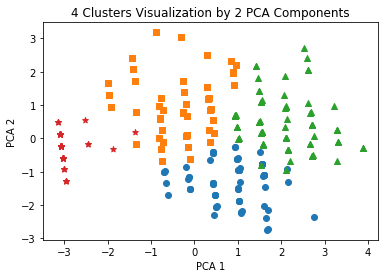

In [69]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = 단신바청_zero[단신바청_zero['cluster']==0].index
marker1_ind = 단신바청_zero[단신바청_zero['cluster']==1].index
marker2_ind = 단신바청_zero[단신바청_zero['cluster']==2].index
marker3_ind = 단신바청_zero[단신바청_zero['cluster']==3].index



# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=단신바청_zero.loc[marker0_ind,'pca_x'], y=단신바청_zero.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=단신바청_zero.loc[marker1_ind,'pca_x'], y=단신바청_zero.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=단신바청_zero.loc[marker2_ind,'pca_x'], y=단신바청_zero.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x=단신바청_zero.loc[marker3_ind,'pca_x'], y=단신바청_zero.loc[marker3_ind,'pca_y'], marker='*')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('4 Clusters Visualization by 2 PCA Components')
plt.show()

## 클러스터를 5개로 했을 때

In [71]:
# 함수를 짜자..

In [107]:
#사용할 데이터 (단신바청)
단신바청=df[['단맛','신맛','바디감','청량감']]
단신바청_zero=단신바청.fillna(0) #결측치 제거
단신바청_zero.values

array([[3., 3., 2., 3.],
       [3., 3., 3., 3.],
       [4., 2., 4., 2.],
       ...,
       [1., 3., 1., 3.],
       [4., 1., 4., 2.],
       [2., 3., 2., 2.]])

In [108]:
단신바청_zero

,단맛,신맛,바디감,청량감
0,3.0,3.0,2.0,3.0
1,3.0,3.0,3.0,3.0
2,4.0,2.0,4.0,2.0
3,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,2.0
...,...,...,...,...
334,1.0,1.0,2.0,3.0
335,1.0,1.0,2.0,2.0
336,1.0,3.0,1.0,3.0
337,4.0,1.0,4.0,2.0


In [336]:
def makeCluster(c_number, iterator): #c_number: 클러스터 개수, iterator:최대 반복횟수,data:단신바청 dataframe
    
    # 단신바청 초기화 (이거 안 하면 계속 누적되서, 클러스터가 달라짐)
    df=pd.read_csv('/Users/lucy/Downloads/inner.csv')
    단신바청_zero=df[['단맛','신맛','바디감','청량감']]
    단신바청_zero=단신바청.fillna(0) # 결측치 제거
    #단신바청_zero
    
    # 단신바청_zero: 결측치는 0으로 채웠다는 의미로 생성한 변수 이름
    #단신바청_zero=data
    # 학습시키기
    # 랜덤으로 해보기
    kmeans = KMeans(n_clusters=c_number, init='random', max_iter=iterator,random_state=0)
    #k-means++써보기
    #kmeans = KMeans(n_clusters=c_number, init='k-means++', max_iter=iterator,random_state=0)
    kmeans.fit(단신바청_zero)
    #print(kmeans.labels_) #k-means 라벨 추출
    
    단신바청_zero['cluster']=kmeans.labels_ # 클러스터 추가
    
    # 2차원으로 축소하기
    
    pca = PCA(n_components=2) # 2차원으로 표현할 거니까
    pca_transformed = pca.fit_transform(단신바청_zero.values) #데이터프레임 말고 값만 가지고

    단신바청_zero['pca_x'] = pca_transformed[:,0]
    단신바청_zero['pca_y'] = pca_transformed[:,1]
    
    # 시각화하기
    var=[]
    for i in range(c_number): # 클러스터 개수만큼
        # 반복문의 i를 가지고 변수명을 만드는 법: globals()
        tmp=globals()['marker{}_ind'.format(i)]=단신바청_zero[단신바청_zero['cluster']==i].index # marker변수생성
        var.append(tmp)
        #str(i)+'marker'+'_ind'=단신바청_zero[단신바청_zero['cluster']==i].index # marker변수생성
    
#     print(marker0_ind)
#     print(marker1_ind)
#     print(marker2_ind)
#    print(marker3_ind) # global변수 정상 동작 확인
    
    markers=['o','s','^','*','.','v','<',','] # 마커들
    
    for i,j in zip(range(len(var)),markers):
        #var='marker'+str(i)+'_ind'
        #print(var)
        plt.scatter(x=단신바청_zero.loc[var[i],'pca_x'], y=단신바청_zero.loc[var[i],'pca_y'], marker=j)
    
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title(str(c_number)+' Clusters Visualization by 2 PCA Components')
    plt.show()
    
    return 단신바청_zero # 클러스터 결과 확인
    
        
    

In [287]:
def inertias(x,data): # x: 클러스터 개수, data: 단신바청 데이터프레임
    inertias=[]
    for i in range(1,x):
        kmeans=KMeans(n_clusters=i)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    # 시각화
    plt.plot(range(1,x), inertias,'-o')
    plt.xlabel('number of clusters, K')
    plt.ylabel('inertia')
    plt.xticks(range(1,x))
    plt.show()

### 단신바청 데이터프레임 초기화 (클러스터 돌리기 전 이거 꼭_
#### 안 하면 군집화 달라짐

In [288]:
df=pd.read_csv('/Users/lucy/Downloads/inner.csv')
단신바청_zero=df[['단맛','신맛','바디감','청량감']]
단신바청_zero=단신바청.fillna(0)
단신바청_zero

,단맛,신맛,바디감,청량감
0,3.0,3.0,2.0,3.0
1,3.0,3.0,3.0,3.0
2,4.0,2.0,4.0,2.0
3,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,2.0
...,...,...,...,...
334,1.0,1.0,2.0,3.0
335,1.0,1.0,2.0,2.0
336,1.0,3.0,1.0,3.0
337,4.0,1.0,4.0,2.0


### 응집도를 통해, 몇 개의 클러스터를 선정할지 결정한다

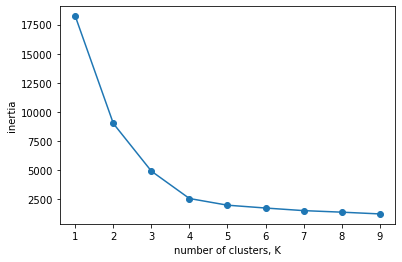

In [318]:
inertias(10, 단신바청_zero)

## random으로 했을 때 가장 좋은 군집화 결과 :: 4개 클러스터, 300번 이후로 변화 없음

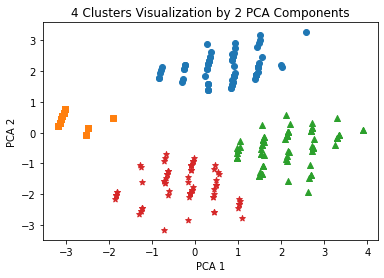

In [325]:
#makeCluster(c_number, iterator, data):


# random으로 했을 때
#클러스터 5개, 300번 반복
makeCluster(4,300)

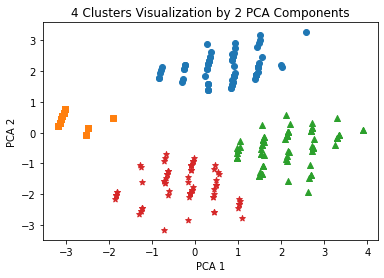

      단맛   신맛  바디감  청량감  cluster     pca_x     pca_y
0    3.0  3.0  2.0  3.0        2  2.162506  0.011746
1    3.0  3.0  3.0  3.0        2  2.131512 -0.096762
2    4.0  2.0  4.0  2.0        2  1.520008 -1.284390
3    4.0  4.0  3.0  3.0        2  3.300555 -0.179263
4    3.0  3.0  3.0  2.0        2  1.573768 -0.244414
..   ...  ...  ...  ...      ...       ...       ...
334  1.0  1.0  2.0  3.0        0 -0.307805  1.631678
335  1.0  1.0  2.0  2.0        3 -0.667212 -0.698368
336  1.0  3.0  1.0  3.0        0  0.914998  2.589153
337  4.0  1.0  4.0  2.0        3  0.990215 -2.436338
338  2.0  3.0  2.0  2.0        0  0.899398  1.826009

[339 rows x 7 columns]


In [340]:
check_clusters=makeCluster(4,300)
print(check_clusters)

In [343]:
check_clusters.to_csv('K-means결과(랜덤).csv')

## K-means ++로 했을 때

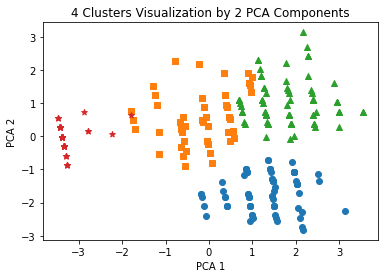

In [331]:
makeCluster(4,300)

## --> 같은 feature, 랜덤이 더 좋은 결과

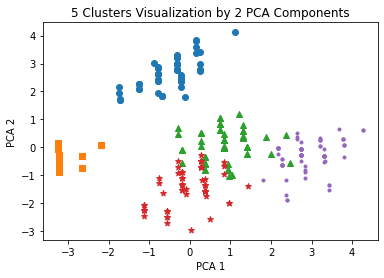

,단맛,신맛,바디감,청량감,cluster,pca_x,pca_y
0,3.0,3.0,2.0,3.0,4,2.740271,-0.075665
1,3.0,3.0,3.0,3.0,4,2.744494,-0.283603
2,4.0,2.0,4.0,2.0,4,2.379703,-1.689371
3,4.0,4.0,3.0,3.0,4,3.786518,0.075739
4,3.0,3.0,3.0,2.0,4,2.272034,-0.630051
...,...,...,...,...,...,...,...
334,1.0,1.0,2.0,3.0,2,-0.299823,0.485880
335,1.0,1.0,2.0,2.0,3,-0.294260,-0.500682
336,1.0,3.0,1.0,3.0,0,-0.321516,3.184771
337,4.0,1.0,4.0,2.0,2,0.954367,-1.014504


In [345]:
makeCluster(5,300)

In [ ]:
# k-means++로 했을 때
makeCluster(5,10000)

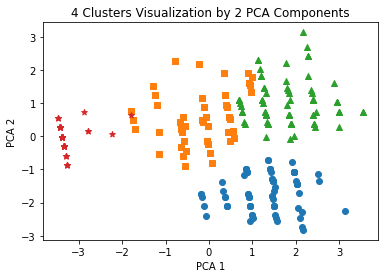

In [315]:
# random으로 했을 때
makeCluster(4,1000)

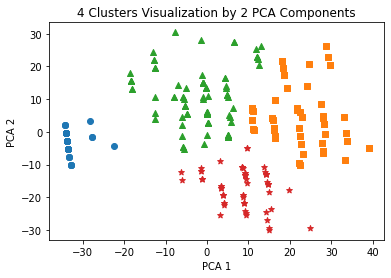

In [266]:
# k-means++로 했을 때 
makeCluster(4,300,단신바청_zero) #데이터프레임으로 넣어야 함

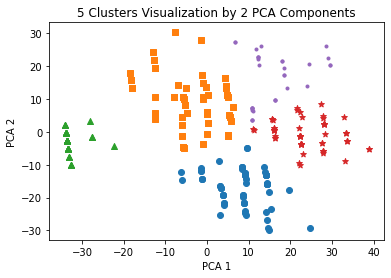

In [260]:
makeCluster(5,400,단신바청_zero)

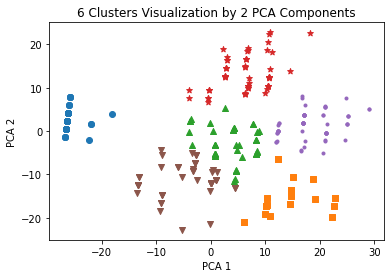

In [217]:
makeCluster(6,300,단신바청_zero)

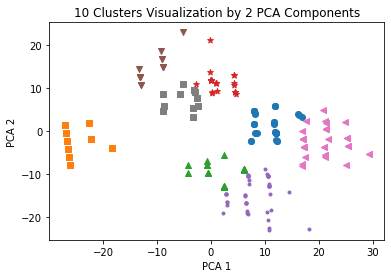

In [218]:
makeCluster(10,300,단신바청_zero)

#### -- 겹치는 게 많아서 10,300은 안 될 듯

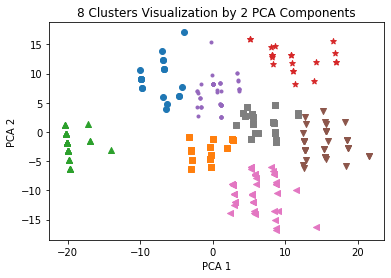

In [165]:
makeCluster(8,1400,단신바청_zero)

##### --꽤나 의미 있어보임

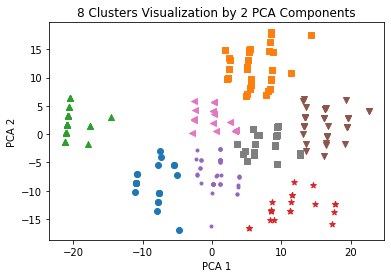

In [168]:
makeCluster(8,1400,단신바청_zero)

# K-means 초기 설정값

### 군집 수 설정하기
    ####  Rule of thumb
    #### Elbow Method
    #### 정보 기준 접근법 
### 초기 중심점 설정하기
    #### Randomly select
    #### Manually assign
    #### K-means ++


In [269]:
단신바청_zero

,단맛,신맛,바디감,청량감
0,3.0,3.0,2.0,3.0
1,3.0,3.0,3.0,3.0
2,4.0,2.0,4.0,2.0
3,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,2.0
...,...,...,...,...
334,1.0,1.0,2.0,3.0
335,1.0,1.0,2.0,2.0
336,1.0,3.0,1.0,3.0
337,4.0,1.0,4.0,2.0


In [347]:
dfc=pd.read_csv('/Users/lucy/Downloads/inner.csv')
dfc=dfc[['단맛','신맛','바디감','청량감']]

In [348]:
dfc

,단맛,신맛,바디감,청량감
0,3.0,3.0,2.0,3.0
1,3.0,3.0,3.0,3.0
2,4.0,2.0,4.0,2.0
3,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,2.0
...,...,...,...,...
334,1.0,1.0,2.0,3.0
335,1.0,1.0,2.0,2.0
336,1.0,3.0,1.0,3.0
337,4.0,1.0,4.0,2.0


In [353]:
dfc.dropna(axis=0)

,단맛,신맛,바디감,청량감
0,3.0,3.0,2.0,3.0
1,3.0,3.0,3.0,3.0
2,4.0,2.0,4.0,2.0
3,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,2.0
...,...,...,...,...
334,1.0,1.0,2.0,3.0
335,1.0,1.0,2.0,2.0
336,1.0,3.0,1.0,3.0
337,4.0,1.0,4.0,2.0


In [359]:
dfc.isnull().sum()

단맛     71
신맛     88
바디감     5
청량감    98
dtype: int64